<center>
<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/1/1d/Logo_T%C3%A9l%C3%A9com_SudParis.svg/1014px-Logo_T%C3%A9l%C3%A9com_SudParis.svg.png" width="10%" />
</center>

<center> <h2> NET 4550 Machine Learning </h2> </center>

# QoE - Project From Network Traffic Measurements to QoE for Internet Video

#### QoE = Quality of Experience

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pickle
from os.path import isfile


In [3]:
df = pd.read_csv('dataset.csv')

In [3]:
print("Dimensions du dataset:", df.shape)
df.head()

Dimensions du dataset: (111919, 270)


,videoID,category,bitrates_144p,bitrates_240p,bitrates_360p,bitrates_480p,bitrates_720p,bitrates_1080p,join_time,stallingNumber,...,QoE_JT,QoE_noStall,QoE_noSwitches,QoE_Linear,QoE_Linear2,QoE_Linear3,QoE_LD_SD_HD,QoE_ITU_023,QoE_ITU_035,QoE_ITU_046
0,NeZ8BQBl8NA,Film & Animation,67101,63551,123054,205503,422644,824186,3411,0,...,1,0,0,5.0,5.0,5.0,2,5.0,4.44397,4.42413
1,FWpRqKpV0rY,Education,76305,111936,204952,340239,744420,1683577,2883,0,...,1,0,0,5.0,5.0,5.0,2,5.0,4.61882,4.58419
2,n72yt5hc3-A,Travel & Events,91757,123729,195255,303189,682584,1385367,4803,0,...,1,0,0,5.0,5.0,5.0,2,5.0,4.58990,4.55993
3,v0_uAqzWlUM,Sports,91222,162811,305089,531184,1191866,2349128,310000,0,...,0,0,0,0.0,0.0,0.0,0,5.0,4.68886,4.63004
4,aD3Ahnee0Ck,Film & Animation,104747,223032,411669,682377,1345939,2442657,310000,0,...,0,0,0,0.0,0.0,0.0,0,-1.0,-1.00000,-1.00000


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111919 entries, 0 to 111918
Data columns (total 270 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    videoID                        object 
 1    category                       object 
 2    bitrates_144p                  int64  
 3    bitrates_240p                  int64  
 4    bitrates_360p                  int64  
 5    bitrates_480p                  int64  
 6    bitrates_720p                  int64  
 7    bitrates_1080p                 int64  
 8    join_time                      int64  
 9    stallingNumber                 int64  
 10   totalStallDuration             int64  
 11   outbandQoS_DL_TP               float64
 12   outbandQoS_UL_TP               float64
 13   outbandQoS_RTT                 float64
 14   outbandQoS_RTT_STD             float64
 15   outbandQoS_LOSS                float64
 16   pcapStats_stats_avg_DL_TP      float64
 17   pcapStats_stats_avg_UL_t   

## Retrait des valeurs non pertinentes

In [5]:
df.describe()

,bitrates_144p,bitrates_240p,bitrates_360p,bitrates_480p,bitrates_720p,bitrates_1080p,join_time,stallingNumber,totalStallDuration,outbandQoS_DL_TP,...,QoE_JT,QoE_noStall,QoE_noSwitches,QoE_Linear,QoE_Linear2,QoE_Linear3,QoE_LD_SD_HD,QoE_ITU_023,QoE_ITU_035,QoE_ITU_046
count,111919.000000,111919.000000,1.119190e+05,1.119190e+05,1.119190e+05,1.119190e+05,111919.000000,111919.000000,1.119190e+05,111919.000000,...,111919.000000,111919.000000,111919.000000,111919.000000,111919.000000,111919.000000,111919.000000,111919.000000,111919.000000,111919.000000
mean,84332.577981,161488.427309,2.969415e+05,5.182005e+05,1.042117e+06,1.942902e+06,25931.106792,0.261645,8.438969e+02,2718.626028,...,0.933872,0.113600,0.678535,3.701106,3.580089,3.421945,1.118353,4.701973,3.508724,3.477920
std,20668.859700,56534.866093,1.052576e+05,1.989788e+05,4.036144e+05,7.196426e+05,75781.259241,1.021496,8.400910e+03,2214.803320,...,0.248507,0.317326,0.467041,1.442905,1.488462,1.536845,0.848809,1.103947,1.218091,1.224797
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.503000e+03,424.000000,0.000000,0.000000e+00,14.413600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,80330.500000,123167.500000,2.260455e+05,3.745360e+05,7.558940e+05,1.466794e+06,2150.000000,0.000000,0.000000e+00,959.413500,...,1.000000,0.000000,0.000000,2.977380,2.711540,2.354365,0.000000,5.000000,2.888710,2.812640
50%,91811.000000,173440.000000,3.190800e+05,5.480470e+05,1.104771e+06,2.096539e+06,3627.000000,0.000000,0.000000e+00,2160.470000,...,1.000000,0.000000,1.000000,4.221490,4.086810,3.929890,1.000000,5.000000,3.816160,3.833200
75%,96949.000000,208920.500000,3.848440e+05,6.891835e+05,1.388100e+06,2.536442e+06,9592.000000,0.000000,0.000000e+00,3958.370000,...,1.000000,0.000000,1.000000,4.897620,4.854170,4.784930,2.000000,5.000000,4.440985,4.423630
max,224840.000000,912737.000000,1.737032e+06,2.469066e+06,6.597562e+06,1.617896e+07,310000.000000,55.000000,1.149329e+06,10000.900000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,4.922150


In [6]:
def remove_zero_bitrates(df):

    bitrate_columns = [
        'bitrates_144p', 'bitrates_240p', 'bitrates_360p', 
        'bitrates_480p', 'bitrates_720p', 'bitrates_1080p'
    ]
    # Vérification que les colonnes existent
    available_bitrate_columns = [col for col in bitrate_columns if col in df.columns]
    
    if not available_bitrate_columns:
        return df
    
    # Création du masque pour les lignes où tous les bitrates sont non nuls
    mask = (df[available_bitrate_columns] != 0).all(axis=1)
    
    # Application du filtre
    return df[mask]

# Application de la fonction
df_cleaned = remove_zero_bitrates(df)

In [7]:
df_cleaned.describe()

,bitrates_144p,bitrates_240p,bitrates_360p,bitrates_480p,bitrates_720p,bitrates_1080p,join_time,stallingNumber,totalStallDuration,outbandQoS_DL_TP,...,QoE_JT,QoE_noStall,QoE_noSwitches,QoE_Linear,QoE_Linear2,QoE_Linear3,QoE_LD_SD_HD,QoE_ITU_023,QoE_ITU_035,QoE_ITU_046
count,111913.000000,111913.000000,1.119130e+05,1.119130e+05,1.119130e+05,1.119130e+05,111913.000000,111913.000000,1.119130e+05,111913.000000,...,111913.000000,111913.000000,111913.000000,111913.000000,111913.000000,111913.000000,111913.000000,111913.000000,111913.000000,111913.000000
mean,84336.495564,161495.734660,2.969549e+05,5.182233e+05,1.042173e+06,1.942914e+06,25929.374907,0.261319,8.433832e+02,2718.664532,...,0.933877,0.113588,0.678563,3.701104,3.580094,3.421943,1.118342,4.702020,3.508683,3.477926
std,20661.664724,56526.067428,1.052417e+05,1.989539e+05,4.035531e+05,7.196225e+05,75778.433090,1.018446,8.400148e+03,2214.833146,...,0.248498,0.317312,0.467030,1.442880,1.488446,1.536831,0.848802,1.103892,1.218095,1.224804
min,2804.000000,2492.000000,2.936000e+03,3.352000e+03,4.139000e+03,6.503000e+03,424.000000,0.000000,0.000000e+00,14.413600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,80335.000000,123173.000000,2.260550e+05,3.745770e+05,7.559670e+05,1.466818e+06,2150.000000,0.000000,0.000000e+00,959.429000,...,1.000000,0.000000,0.000000,2.977380,2.711540,2.354330,0.000000,5.000000,2.888670,2.812680
50%,91812.000000,173444.000000,3.190850e+05,5.480590e+05,1.104778e+06,2.096539e+06,3626.000000,0.000000,0.000000e+00,2160.470000,...,1.000000,0.000000,1.000000,4.221490,4.086810,3.929890,1.000000,5.000000,3.816100,3.833200
75%,96950.000000,208923.000000,3.848520e+05,6.891910e+05,1.388106e+06,2.536440e+06,9591.000000,0.000000,0.000000e+00,3958.380000,...,1.000000,0.000000,1.000000,4.897620,4.854170,4.784930,2.000000,5.000000,4.440970,4.423640
max,224840.000000,912737.000000,1.737032e+06,2.469066e+06,6.597562e+06,1.617896e+07,310000.000000,55.000000,1.149329e+06,10000.900000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,4.922150


In [32]:
columns_to_exclude = ['videoID', 'category']
columns_to_analyze = [col for col in df.columns if col not in columns_to_exclude]

correlation_matrix = df[columns_to_analyze].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

correlation_values = correlation_matrix.values
correlation_columns = correlation_matrix.columns

# Initialiser une liste pour stocker les paires de colonnes avec les plus grosses corrélations
top_correlations = []

# Parcourir la matrice de corrélation
for i in range(len(correlation_values)):
    for j in range(i + 1, len(correlation_values)):
        if abs(correlation_values[i, j]) > 0.7:  # Seuil de corrélation
            top_correlations.append((correlation_columns[i], correlation_columns[j], correlation_values[i, j]))

# Trier les paires de colonnes par ordre décroissant de corrélation
top_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

# Imprimer les plus grosses valeurs de corrélation
for pair in top_correlations:
    print(f"Corrélation entre {pair[0]} et {pair[1]}: {pair[2]:.2f}")

Corrélation entre chunkSizesPcapVideo_avg et kmeansCenterVideo: 1.00
Corrélation entre chunkSizesPcapAudio_avg et kmeansCenterAudio: 1.00
Corrélation entre join_time et QoE_JT: -1.00
Corrélation entre chunkSizesPcapVideo_avg et chunkSizesPcapVideo_p50: 1.00
Corrélation entre avgResQual et QoE_Linear: 1.00
Corrélation entre chunkSizesPcapVideo_p50 et kmeansCenterVideo: 1.00
Corrélation entre chunkSizesPcapAudio_avg et chunkSizesPcapAudio_p50: 1.00
Corrélation entre chunkSizesPcapAudio_p50 et kmeansCenterAudio: 1.00
Corrélation entre QoE_ITU_035 et QoE_ITU_046: 0.99
Corrélation entre chunkSizesPcapVideo_avg et chunkSizesPcapVideo_p75: 0.99
Corrélation entre chunkSizesPcapVideo_p75 et kmeansCenterVideo: 0.99
Corrélation entre QoE_Linear et QoE_Linear2: 0.99
Corrélation entre QoE_Linear2 et QoE_Linear3: 0.99
Corrélation entre bitrates_240p et bitrates_360p: 0.99
Corrélation entre chunkSizesPcapVideo_avg et chunkSizesPcapVideo_p25: 0.99
Corrélation entre chunkSizesPcapVideo_p25 et kmeansCen

In [28]:
def remove_highly_correlated_columns(df, threshold=0.7):
    corr_matrix = df.corr().abs()
    columns_to_drop = set()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                col_name = corr_matrix.columns[i]
                columns_to_drop.add(col_name)
    df_reduced = df.drop(columns=columns_to_drop)

    return df_reduced

Corrélation entre pcapStats_temporal_DLTP_t65 et pcapStats_temporal_DLTP_t66: 0.70
Corrélation entre pcapStats_temporal_DLTP_t62 et pcapStats_temporal_DLTP_t63: 0.70
Corrélation entre pcapStats_temporal_DLTP_t60 et pcapStats_temporal_DLTP_t61: 0.70
Corrélation entre pcapStats_temporal_DLTP_t59 et pcapStats_temporal_DLTP_t60: 0.70
Corrélation entre pcapStats_temporal_DLTP_t70 et pcapStats_temporal_DLTP_t71: 0.70
Corrélation entre pcapStats_temporal_DLTP_t56 et pcapStats_temporal_DLTP_t57: 0.70
Corrélation entre pcapStats_first30sec_DLTP_t20 et pcapStats_first30sec_DLTP_t21: 0.69
Corrélation entre pcapStats_temporal_DLTP_t58 et pcapStats_temporal_DLTP_t59: 0.69
Corrélation entre pcapStats_first30sec_DLTP_t19 et pcapStats_first30sec_DLTP_t20: 0.69
Corrélation entre pcapStats_first30sec_DLTP_t22 et pcapStats_first30sec_DLTP_t23: 0.69
Corrélation entre pcapStats_temporal_DLTP_t63 et pcapStats_temporal_DLTP_t64: 0.69
Corrélation entre pcapStats_first30sec_DLTP_t23 et pcapStats_first30sec_DLT

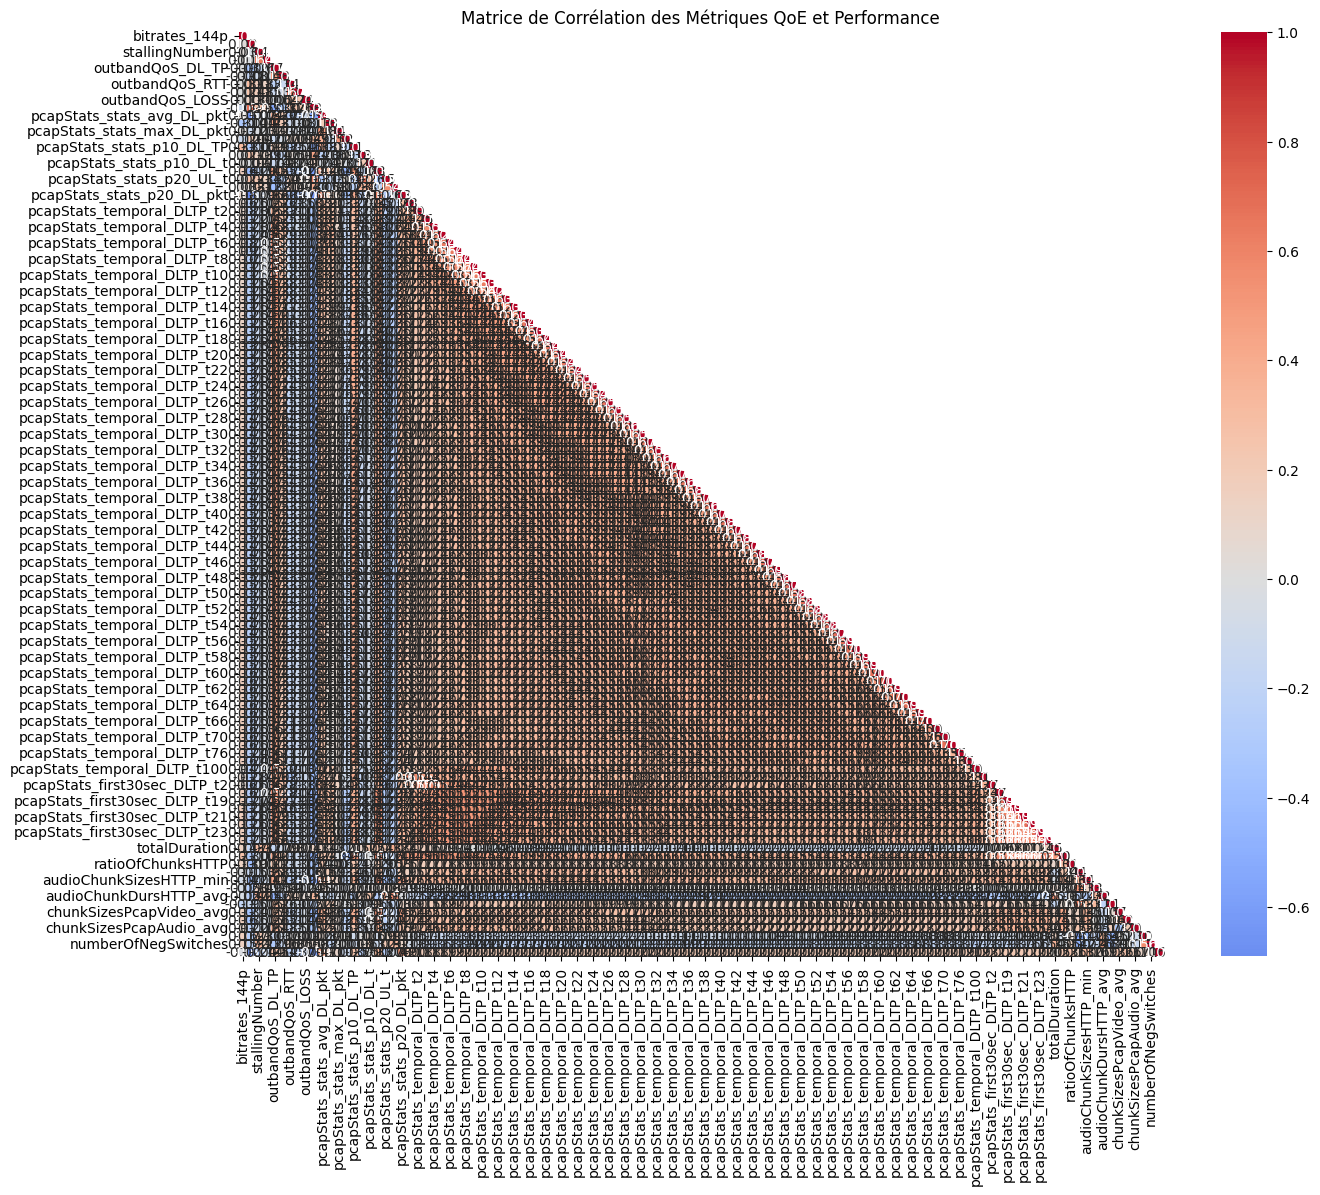

In [34]:
columns_to_exclude = ['videoID', 'category']
df2 = df_cleaned.drop(columns=columns_to_exclude)
df_reduced = remove_highly_correlated_columns(df2, threshold=0.7)


columns_to_analyze = [col for col in df_cleaned.columns if col in df_reduced.columns]
correlation_matrix = df_reduced[columns_to_analyze].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

correlation_values = correlation_matrix.values
correlation_columns = correlation_matrix.columns

# Initialiser une liste pour stocker les paires de colonnes avec les plus grosses corrélations
top_correlations = []

# Parcourir la matrice de corrélation
for i in range(len(correlation_values)):
    for j in range(i + 1, len(correlation_values)):
        if abs(correlation_values[i, j]) > 0.6:  # Seuil de corrélation
            top_correlations.append((correlation_columns[i], correlation_columns[j], correlation_values[i, j]))

# Trier les paires de colonnes par ordre décroissant de corrélation
top_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

# Imprimer les plus grosses valeurs de corrélation
for pair in top_correlations:
    print(f"Corrélation entre {pair[0]} et {pair[1]}: {pair[2]:.2f}")

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
# Création du heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True,
            mask=mask)
plt.title('Matrice de Corrélation des Métriques QoE et Performance')
plt.show()
    

In [35]:
print(len(columns_to_analyze))

116


In [10]:
target = 'QoE_Linear' # Sélection de la variable cible (QoE_Linear)

# Sélection des caractéristiques (en excluant les autres métriques QoE)
features = [col for col in df_cleaned.columns if col not in columns_to_analyze]

# Préparation des données
X = df_cleaned[features]
y = df_cleaned[target]

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Définition des paramètres pour la recherche aléatoire
param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [16, 32, 64, 128, 256],
    'min_impurity_decrease': [0, 0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Création du modèle de base
tree = DecisionTreeRegressor(random_state=42)

# Recherche aléatoire des meilleurs hyperparamètres
search = RandomizedSearchCV(
    estimator=tree,
    param_distributions=param_grid,
    n_iter=50,  # Nombre de configurations à tester
    scoring='neg_mean_squared_error',
    cv=5,  # Validation croisée à 5 plis
    verbose=2,
    random_state=42,
    n_jobs=-1  # Utilisation de tous les CPUs
)



In [12]:
def search_or_load(model_filename, search, X_train, y_train):
    if isfile(model_filename):
        print("Chargement du modèle existant")
        model = pickle.load(open(model_filename, 'rb'))
    else:
        print("Recherche des meilleurs hyperparamètres")
        search.fit(X_train, y_train)
        print("Meilleurs paramètres trouvés:", search.best_params_)
        model = search.best_estimator_
        print("Entraînement du modèle")
        model.fit(X_train, y_train)
        pickle.dump(model, open(model_filename, 'wb'))
        print("Modèle sauvegardé dans", model_filename)
    return model

In [ ]:
# model_filename = 'qoe_decision_tree.pkl'
# model = search_or_load(model_filename, search, X_train, y_train)

# # Évaluation du modèle
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print("\nPerformance du modèle:")
# print(f"MSE: {mse:.4f}")
# print(f"RMSE: {rmse:.4f}")
# print(f"R²: {r2:.4f}")

# # Visualisation de l'arbre
# plt.figure(figsize=(20,10))
# plot_tree(model, 
#           feature_names=features,
#           class_names=target,
#           filled=True,
#           rounded=True,
#           fontsize=10)
# plt.title("Arbre de Décision CART pour la Prédiction de QoE")
# plt.show()

# # Importance des caractéristiques
# feature_importance = pd.DataFrame({
#     'feature': features,
#     'importance': model.feature_importances_
# })
# feature_importance = feature_importance.sort_values('importance', ascending=False)

# print("\nTop 10 des caractéristiques les plus importantes:")
# print(feature_importance.head(10))

# # Visualisation de l'importance des caractéristiques
# plt.figure(figsize=(12, 6))
# plt.bar(range(len(feature_importance.head(10))), 
#         feature_importance.head(10)['importance'])
# plt.xticks(range(len(feature_importance.head(10))), 
#            feature_importance.head(10)['feature'], 
#            rotation=45, 
#            ha='right')
# plt.title('Top 10 des Caractéristiques les Plus Importantes')
# plt.tight_layout()
# plt.show()